In [ ]:
import pandas as pd
from textblob import TextBlob
import re

class SentimentAnalyzer(object):
    def __init__(self, url='https://query.data.world/s/bzclhxoqewt3jpuae6cnpd4gbklzn2?dws=00000'):
        self.dataset = pd.read_csv(url, encoding='latin1')

    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def get_tweet_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

    def analyze_sentiments(self):
        self.dataset['clean_text'] = self.dataset['text'].apply(self.clean_tweet)
        self.dataset['sentiment'] = self.dataset['clean_text'].apply(self.get_tweet_sentiment)

        ptweets = self.dataset[self.dataset['sentiment'] == 'positive']
        ntweets = self.dataset[self.dataset['sentiment'] == 'negative']
        neutral_tweets = self.dataset[self.dataset['sentiment'] == 'neutral']

        positive_percentage = (len(ptweets) / len(self.dataset)) * 100
        negative_percentage = (len(ntweets) / len(self.dataset)) * 100
        neutral_percentage = (len(neutral_tweets) / len(self.dataset)) * 100

        print("Positive tweets percentage: {:.2f} %".format(positive_percentage))
        print("Negative tweets percentage: {:.2f} %".format(negative_percentage))
        print("Neutral tweets percentage: {:.2f} %".format(neutral_percentage))

def main():
    analyzer = SentimentAnalyzer()
    analyzer.analyze_sentiments()

if __name__ == "__main__":
    main()

Positive tweets percentage: 40.05 %
Negative tweets percentage: 13.85 %
Neutral tweets percentage: 46.10 %


In [ ]:
pip install matplotlib

Positive tweets percentage: 40.05 %
Negative tweets percentage: 13.85 %
Neutral tweets percentage: 46.10 %


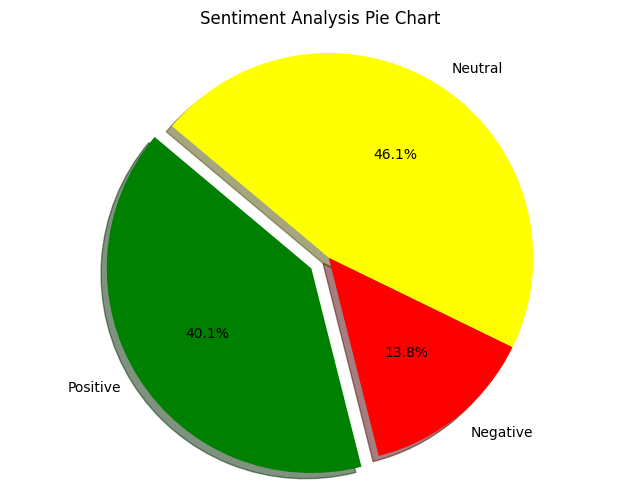

In [ ]:
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

class SentimentAnalyzer(object):
    def __init__(self, url='https://query.data.world/s/bzclhxoqewt3jpuae6cnpd4gbklzn2?dws=00000'):
        self.dataset = pd.read_csv(url, encoding='latin1')

    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def get_tweet_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

    def analyze_sentiments(self):
        self.dataset['clean_text'] = self.dataset['text'].apply(self.clean_tweet)
        self.dataset['sentiment'] = self.dataset['clean_text'].apply(self.get_tweet_sentiment)

        ptweets = self.dataset[self.dataset['sentiment'] == 'positive']
        ntweets = self.dataset[self.dataset['sentiment'] == 'negative']
        neutral_tweets = self.dataset[self.dataset['sentiment'] == 'neutral']

        positive_percentage = (len(ptweets) / len(self.dataset)) * 100
        negative_percentage = (len(ntweets) / len(self.dataset)) * 100
        neutral_percentage = (len(neutral_tweets) / len(self.dataset)) * 100

        print("Positive tweets percentage: {:.2f} %".format(positive_percentage))
        print("Negative tweets percentage: {:.2f} %".format(negative_percentage))
        print("Neutral tweets percentage: {:.2f} %".format(neutral_percentage))


        labels = ['Positive', 'Negative', 'Neutral']
        sizes = [positive_percentage, negative_percentage, neutral_percentage]
        colors = ['green', 'red', 'yellow']
        explode = (0.1, 0, 0)
        plt.figure(figsize=(8, 6))
        plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140)
        plt.title('Sentiment Analysis Pie Chart')
        plt.axis('equal')
        plt.show()

def main():
    analyzer = SentimentAnalyzer()
    analyzer.analyze_sentiments()

if __name__ == "__main__":
    main()


In [ ]:
pip install wordcloud

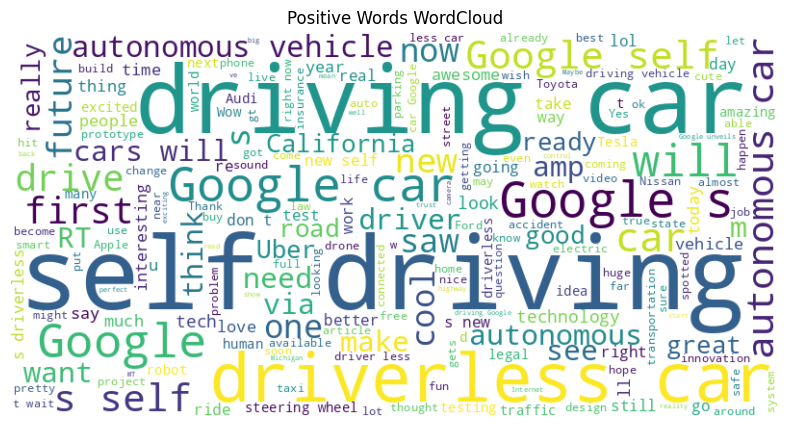

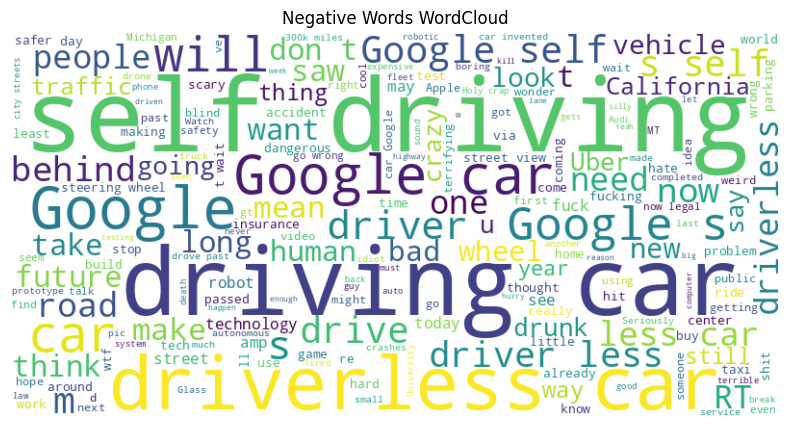

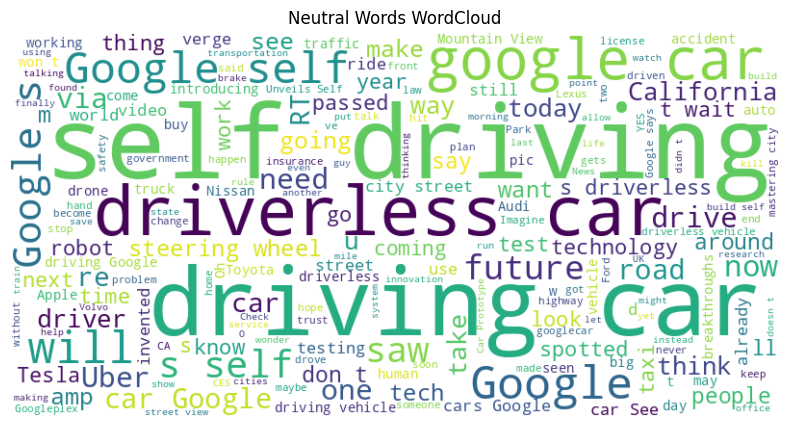

In [ ]:
import pandas as pd
from textblob import TextBlob
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

class SentimentAnalyzer(object):
    def __init__(self, url='https://query.data.world/s/bzclhxoqewt3jpuae6cnpd4gbklzn2?dws=00000'):
        self.dataset = pd.read_csv(url, encoding='latin1')

    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def get_tweet_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

    def extract_words_by_sentiment(self, sentiment):
        filtered_words = ' '.join(self.dataset[self.dataset['sentiment'] == sentiment]['clean_text'])
        return filtered_words

    def generate_wordcloud(self, words, title):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()

    def analyze_sentiments(self):
        self.dataset['clean_text'] = self.dataset['text'].apply(self.clean_tweet)
        self.dataset['sentiment'] = self.dataset['clean_text'].apply(self.get_tweet_sentiment)

        for sentiment in ['positive', 'negative', 'neutral']:
            filtered_words = self.extract_words_by_sentiment(sentiment)
            title = f"{sentiment.capitalize()} Words WordCloud"
            self.generate_wordcloud(filtered_words, title)

def main():
    analyzer = SentimentAnalyzer()
    analyzer.analyze_sentiments()

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd
from textblob import TextBlob
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score

class SentimentAnalyzer(object):
    def __init__(self, url='https://query.data.world/s/bzclhxoqewt3jpuae6cnpd4gbklzn2?dws=00000'):
        self.dataset = pd.read_csv(url, encoding='latin1')

    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def get_tweet_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

    def analyze_sentiments(self):
        self.dataset['clean_text'] = self.dataset['text'].apply(self.clean_tweet)
        self.dataset['sentiment'] = self.dataset['clean_text'].apply(self.get_tweet_sentiment)

        # Calculate true labels (y_true) from the dataset
        y_true = self.dataset['sentiment']

        # Calculate predicted labels (y_pred) by applying sentiment analysis to cleaned tweets
        y_pred = self.dataset['clean_text'].apply(self.get_tweet_sentiment)

        # Compute accuracy, precision, and recall scores
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')

        # Print evaluation metrics
        print("Accuracy: {:.2f}".format(accuracy))
        print("Precision: {:.2f}".format(precision))
        print("Recall: {:.2f}".format(recall))

def main():
    analyzer = SentimentAnalyzer()
    analyzer.analyze_sentiments()

if __name__ == "__main__":
    main()


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
